# Requirements
- python==3.7
- tensorflow==2.3.0
- Keras==2.4.3
- numpy==1.19.5
- opencv-python==4.5.2.54

In [9]:
!git clone https://github.com/lacmus-foundation/lacmus.git
!cd lacmus && pip install numpy==1.19.5 && pip install . && python setup.py build_ext --inplace

Cloning into 'lacmus'...
remote: Enumerating objects: 2048, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 2048 (delta 39), reused 86 (delta 24), pack-reused 1910
Receiving objects: 100% (2048/2048), 59.15 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (1075/1075), done.
Processing /home/gosha20777/Documents/projects/ods-activities/cv-competition-1/tf-baseline/lacmus
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=211331 sha256=7f15ea7e4273c96aa3c543881e297b872e1057d2b05794

creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/keras_retinanet
creating build/lib.linux-x86_64-3.7/keras_retinanet/utils
gcc -pthread -shared -B /home/gosha20777/anaconda3/envs/tf-baseline/compiler_compat -L/home/gosha20777/anaconda3/envs/tf-baseline/lib -Wl,-rpath=/home/gosha20777/anaconda3/envs/tf-baseline/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.o -o build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [11]:
!cd lacmus && keras_retinanet/bin/train.py -h

usage: train.py [-h]
                [--snapshot SNAPSHOT | --imagenet-weights | --weights WEIGHTS | --no-weights]
                [--backbone BACKBONE] [--batch-size BATCH_SIZE] [--gpu GPU]
                [--multi-gpu MULTI_GPU] [--multi-gpu-force]
                [--initial-epoch INITIAL_EPOCH] [--epochs EPOCHS]
                [--steps STEPS] [--lr LR]
                [--optimizer-clipnorm OPTIMIZER_CLIPNORM]
                [--regression-weight REGRESSION_WEIGHT]
                [--classification-weight CLASSIFICATION_WEIGHT]
                [--focal-alpha FOCAL_ALPHA] [--focal-gamma FOCAL_GAMMA]
                [--snapshot-path SNAPSHOT_PATH]
                [--tensorboard-dir TENSORBOARD_DIR]
                [--tensorboard-freq TENSORBOARD_FREQ] [--no-snapshots]
                [--no-evaluation] [--freeze-backbone] [--no-random-transform]
                [--image-min-side IMAGE_MIN_SIDE]
                [--image-max-side IMAGE_MAX_SIDE] [--no-resize]
                [--config CO

In [10]:
!cd lacmus && \
!    keras_retinanet/bin/train.py --epoch 1 --steps 10 --config config.ini --snapshot-path snapshots --tensorboard-dir logs --tensorboard-freq 10  pascal ../../data/TrainingData

Creating model, this may take a second...
2021-06-18 14:46:50.874068: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-06-18 14:46:50.894290: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2599990000 Hz
2021-06-18 14:46:50.895872: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f3254f1d40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-18 14:46:50.895968: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shap

 1/10 [==>...........................] - ETA: 0s - loss: 3.9797 - regression_loss: 2.8463 - classification_loss: 1.13342021-06-18 14:47:04.028371: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2021-06-18 14:47:08.635927: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2021_06_18_14_47_08
2021-06-18 14:47:08.644952: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2021_06_18_14_47_08/ThinkPad.trace.json.gz
2021-06-18 14:47:08.663001: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2021_06_18_14_47_08
2021-06-18 14:47:08.663087: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2021_06_18_14_47_08

In [40]:
!cd lacmus && \
    keras_retinanet/bin/convert_model.py --config config.ini snapshots/resnet50_pascal_01.h5 snapshots/resnet50_pascal_01_inference.h5 
!ls lacmus/snapshots

2021-06-18 15:19:24.909084: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-06-18 15:19:24.930194: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2599990000 Hz
2021-06-18 15:19:24.930754: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d0f7a5e1e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-18 15:19:24.930794: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
lacmus_v5_inference.h5	resnet50_pascal_01.h5  resnet50_pascal_01_inference.h5


In [16]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# use this to change which GPU to use
gpu = "0"

# set the modified tf session as backend in keras
setup_gpu(gpu)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/lizaalert/lacmus/releases/tag/0.1.1
model_path = os.path.join('lacmus', 'snapshots', 'lacmus_v5_inference.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
#look at: https://github.com/lacmus-foundation/lacmus/blob/master/docs/train-usage.md
#model = models.convert_model(model)


# load label to names mapping for visualization purposes
labels_to_names = {0: 'Pedestrian'}

In [43]:
images = os.listdir('../data/EmptyPart/')
print(sdd_images)

['23.jpg', '70.jpg', '21.jpg', '75.jpg', '154.jpg', '1.jpg', '125.jpg', '31.jpg', '102.jpg', '148.jpg', '123.jpg', '134.jpg', '222.JPG', '152.jpg', '208.JPG', '142.jpg', '36.jpg', '195.jpg', '233.JPG', '38.jpg', '90.jpg', '165.jpg', '64.jpg', '69.jpg', '153.jpg', '141.jpg', '58.jpg', '228.JPG', '173.jpg', '129.jpg', '231.JPG', '167.jpg', '111.jpg', '53.jpg', '215.JPG', '207.JPG', '63.jpg', '179.jpg', '82.jpg', '143.jpg', '144.jpg', '65.jpg', '56.jpg', '10.jpg', '155.jpg', '93.jpg', '46.jpg', '118.jpg', '83.jpg', '160.jpg', '128.jpg', '16.jpg', '112.jpg', '172.jpg', '171.jpg', '209.JPG', '71.jpg', '122.jpg', '54.jpg', '113.jpg', '139.jpg', '126.jpg', '158.jpg', '15.jpg', '68.jpg', '86.jpg', '51.jpg', '92.jpg', '100.jpg', '76.jpg', '213.JPG', '62.jpg', '196.jpg', '81.jpg', '8.jpg', '186.jpg', '0.jpg', '232.JPG', '198.jpg', '7.jpg', '221.JPG', '174.jpg', '203.JPG', '137.jpg', '136.jpg', '59.jpg', '44.jpg', '61.jpg', '84.jpg', '91.jpg', '211.JPG', '88.jpg', '107.jpg', '49.jpg', '175.jpg', 

In [48]:
def run_detection_image(filepath):
    image = read_image_bgr(filepath)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image, min_side=1500, max_side=2000) # default 1333x800

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = label_color(label)
        
        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()
    
    file, ext = os.path.splitext(filepath)
    image_name = file.split('/')[-1] + ext
    output_path = os.path.join('RetinaNet/examples/results/', image_name)
    
    draw_conv = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    cv2.imwrite(output_path, draw_conv)

processing time:  5.373891830444336


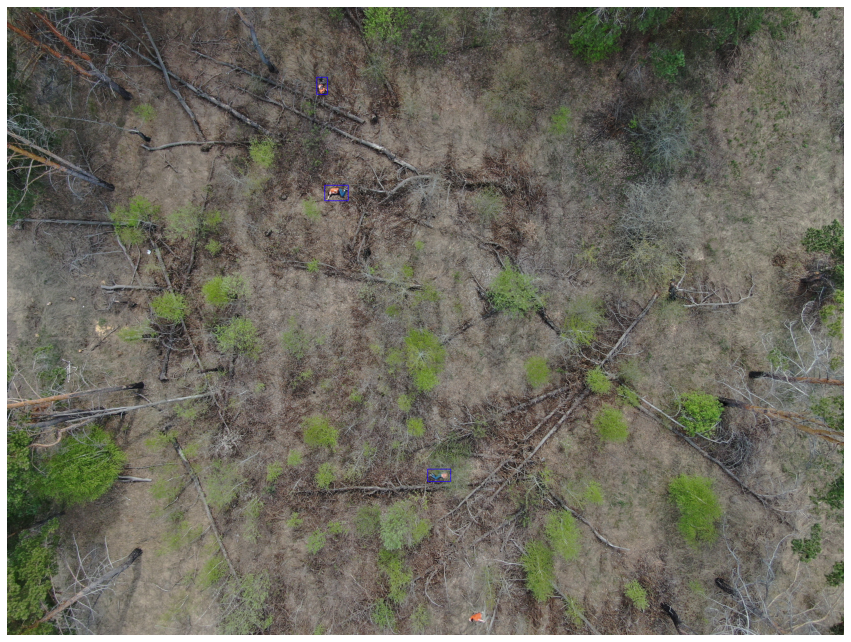

In [49]:
run_detection_image(os.path.join('../data/EmptyPart/', images[0]))